# Data Cleaning and Profiling for Employee Turnover

This notebook focuses on **data profiling and cleaning** to prepare an employee turnover dataset for analysis as part of **TCN1 Task 1 (D599)**. The process ensures data integrity, consistency, and readiness for modeling.

---

## Data Profiling

- Reviewed dataset structure, data types, and sample values  
- Identified missing, duplicate, and inconsistent entries  
- Examined numeric distributions and categorical balance  

---

## Data Cleaning

- Filled missing numeric values with the **median** and categorical values with the **mode**  
- Converted negative values to absolute values  
- Standardized categorical labels and formatting  
- Removed duplicate records and corrected inconsistencies  
- Verified all columns for completeness and accuracy  

---

## Tools Used

- **Python:** Pandas, NumPy, Seaborn, Matplotlib  
- **Environment:** Anaconda (Jupyter Notebook)

---

## Outcome

- Cleaned dataset free of duplicates and formatting errors  
- Consistent and validated structure ready for analysis and modeling  
- Enhanced data quality for future employee retention studies


In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Set pandas display options for better readability
pd.set_option('display.max_columns', None)
pd.set_option('display.float_format', lambda x: f'{x:,.2f}')

In [3]:
# Load dataset
file_path = "Employee Turnover Dataset.csv"
df = pd.read_csv(file_path)

### General Characteristics of the Dataset ###

In [ ]:
# Describe the dataset
print(f"The dataset contains {df.shape[0]} rows and {df.shape[1]} columns.\n")

The dataset contains 10199 rows and 15 columns.



### Data Types and Subtypes ###

In [ ]:
# Data types and subtypes
data_profile = pd.DataFrame({
    "Column Name": df.columns,
    "Data Type": df.dtypes,
    "Subtype": ["Numeric" if pd.api.types.is_numeric_dtype(df[col]) else "Categorical" for col in df.columns]
})
print(data_profile)

                                               Column Name Data Type  \
EmployeeNumber                              EmployeeNumber     int64   
Age                                                    Age     int64   
Tenure                                              Tenure     int64   
Turnover                                          Turnover    object   
HourlyRate                                     HourlyRate     object   
HoursWeekly                                    HoursWeekly     int64   
CompensationType                          CompensationType    object   
AnnualSalary                                  AnnualSalary   float64   
DrivingCommuterDistance            DrivingCommuterDistance     int64   
JobRoleArea                                    JobRoleArea    object   
Gender                                              Gender    object   
MaritalStatus                                MaritalStatus    object   
NumCompaniesPreviouslyWorked  NumCompaniesPreviouslyWorked   flo

### Task A1c: Sample Observable Values ###

In [ ]:
# Sample values for each variable
for col in df.columns:
    print(f"Sample values for {col}: {df[col].unique()[:5]}")

Sample values for EmployeeNumber: [1 2 3 4 5]
Sample values for Age: [28 33 22 23 40]
Sample values for Tenure: [ 6  2  1 16  9]
Sample values for Turnover: ['Yes' 'No']
Sample values for HourlyRate : ['$24.37 ' '$22.52 ' '$88.77 ' '$28.43 ' '$21.87 ']
Sample values for HoursWeekly: [40]
Sample values for CompensationType: ['Salary']
Sample values for AnnualSalary: [ 50689.6  46841.6 284641.6  59134.4  45489.6]
Sample values for DrivingCommuterDistance: [89 35 12  0 76]
Sample values for JobRoleArea: ['Research' 'Information_Technology' 'Sales' 'Human_Resources'
 'Laboratory']
Sample values for Gender: ['Female' 'Prefer Not to Answer' 'Male']
Sample values for MaritalStatus: ['Married' 'Single' 'Divorced']
Sample values for NumCompaniesPreviouslyWorked: [ 3.  6.  1.  7. nan]
Sample values for PaycheckMethod: ['Mail Check' 'Mailed Check' 'Direct_Deposit' 'DirectDeposit'
 'Direct Deposit']
Sample values for TextMessageOptIn: ['Yes' nan 'No']


# Additional Data Inspection

In [7]:
# Check for numeric and categorical columns
numeric_columns = df.select_dtypes(include=['number']).columns
categorical_columns = df.select_dtypes(exclude=['number']).columns
print(f"Numeric columns: {numeric_columns.tolist()}")
print(f"Categorical columns: {categorical_columns.tolist()}")

Numeric columns: ['EmployeeNumber', 'Age', 'Tenure', 'HoursWeekly', 'AnnualSalary', 'DrivingCommuterDistance', 'NumCompaniesPreviouslyWorked']
Categorical columns: ['Turnover', 'HourlyRate ', 'CompensationType', 'JobRoleArea', 'Gender', 'MaritalStatus', 'PaycheckMethod', 'TextMessageOptIn']


In [8]:
# Check for negative values in numeric columns
negative_values = df[numeric_columns].lt(0).sum()
print("\nNegative values in numeric columns:")
print(negative_values)


Negative values in numeric columns:
EmployeeNumber                     0
Age                                0
Tenure                             0
HoursWeekly                        0
AnnualSalary                      57
DrivingCommuterDistance         1351
NumCompaniesPreviouslyWorked       0
dtype: int64


In [9]:
# Check for missing values in all columns
missing_values = df.isnull().sum()
print("\nMissing values per column:")
print(missing_values)


Missing values per column:
EmployeeNumber                     0
Age                                0
Tenure                             0
Turnover                           0
HourlyRate                         0
HoursWeekly                        0
CompensationType                   0
AnnualSalary                       0
DrivingCommuterDistance            0
JobRoleArea                        0
Gender                             0
MaritalStatus                      0
NumCompaniesPreviouslyWorked     665
PaycheckMethod                     0
TextMessageOptIn                2266
dtype: int64


In [10]:
# Display basic descriptive statistics for numeric columns
print("\nDescriptive statistics for numeric columns:")
print(df[numeric_columns].describe())


Descriptive statistics for numeric columns:
       EmployeeNumber       Age    Tenure  HoursWeekly  AnnualSalary  \
count       10,199.00 10,199.00 10,199.00    10,199.00     10,199.00   
mean         5,001.96     44.03      8.99        40.00    120,947.57   
std          2,942.71     10.22      5.51         0.00     77,566.72   
min              1.00     21.00      1.00        40.00    -33,326.40   
25%          2,451.50     37.00      5.00        40.00     63,252.80   
50%          5,001.00     44.00      8.00        40.00    101,566.40   
75%          7,550.50     53.00     13.00        40.00    153,878.40   
max         10,100.00     61.00     20.00        40.00    339,950.40   

       DrivingCommuterDistance  NumCompaniesPreviouslyWorked  
count                10,199.00                      9,534.00  
mean                     45.41                          4.21  
std                      54.01                          2.48  
min                    -275.00                        

In [11]:
# Count unique values in categorical columns
print("\nUnique values in categorical columns:")
for col in categorical_columns:
    print(f"{col}: {df[col].nunique()} unique values")


Unique values in categorical columns:
Turnover: 2 unique values
HourlyRate : 5244 unique values
CompensationType: 1 unique values
JobRoleArea: 12 unique values
Gender: 3 unique values
MaritalStatus: 3 unique values
PaycheckMethod: 7 unique values
TextMessageOptIn: 2 unique values


In [12]:
# Check for duplicate rows
duplicates_count = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates_count}")


Number of duplicate rows: 99



Generating boxplots to inspect outliers:


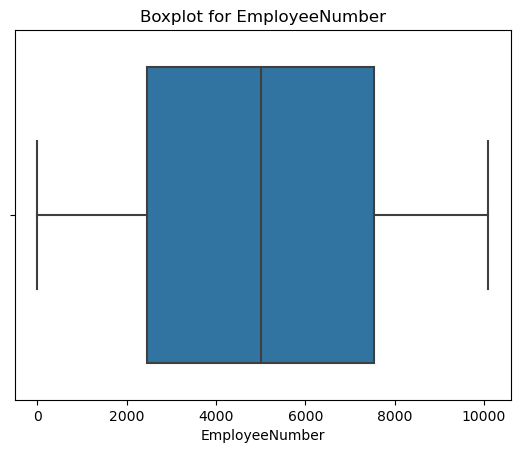

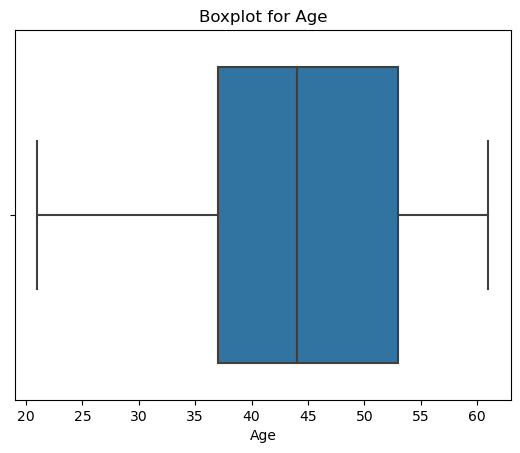

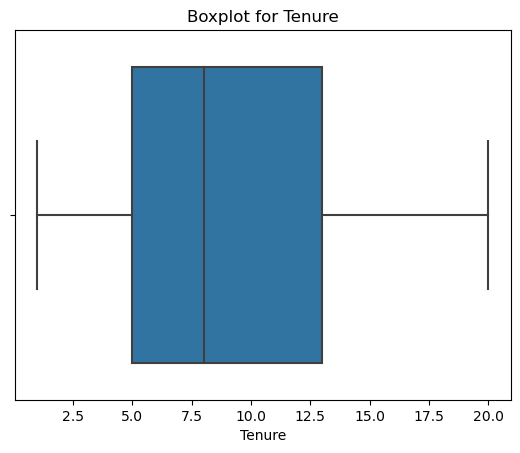

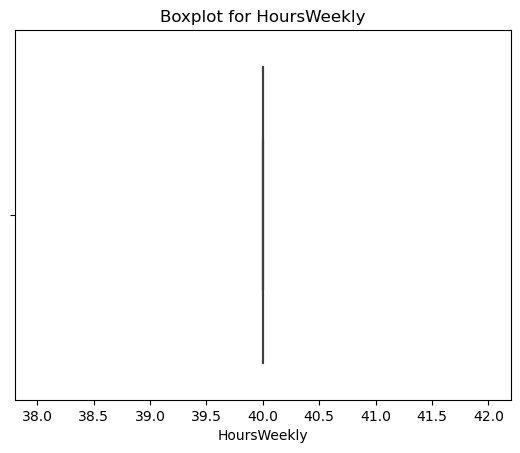

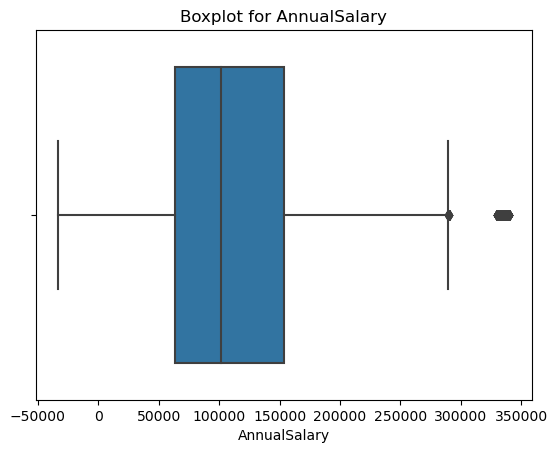

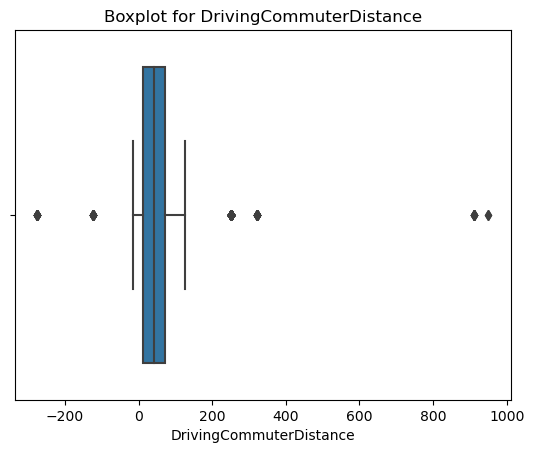

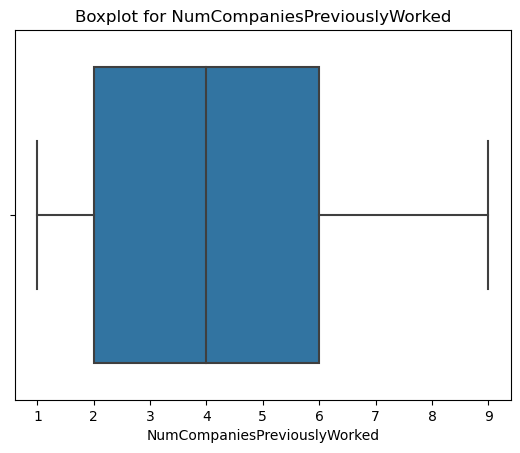

In [13]:
# Visualize outliers using boxplots
print("\nGenerating boxplots to inspect outliers:")
for col in numeric_columns:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

---

## Data Cleaning

This section involves cleaning the dataset by:
1. Handling missing values.
2. Converting negative values to positive.
3. Rounding numeric values.
4. Removing duplicate rows.
5. Standardizing categorical values.

After cleaning, the data is re-inspected to confirm the changes.


In [14]:
# Create a copy of the dataset to retain the original
df_cleaned = df.copy()

In [ ]:
# Handling missing values
def fill_missing_values(data):
    for col in data.columns:
        if pd.api.types.is_numeric_dtype(data[col]):
            data[col].fillna(data[col].median(), inplace=True)  # Use median for numeric
            print(f"Missing values in {col} filled with median.")
        else:
            data[col].fillna(data[col].mode()[0], inplace=True)  # Use mode for categorical
            print(f"Missing values in {col} filled with mode.")

In [16]:
fill_missing_values(df_cleaned)

Missing values in EmployeeNumber filled with median.
Missing values in Age filled with median.
Missing values in Tenure filled with median.
Missing values in Turnover filled with mode.
Missing values in HourlyRate  filled with mode.
Missing values in HoursWeekly filled with median.
Missing values in CompensationType filled with mode.
Missing values in AnnualSalary filled with median.
Missing values in DrivingCommuterDistance filled with median.
Missing values in JobRoleArea filled with mode.
Missing values in Gender filled with mode.
Missing values in MaritalStatus filled with mode.
Missing values in NumCompaniesPreviouslyWorked filled with median.
Missing values in PaycheckMethod filled with mode.
Missing values in TextMessageOptIn filled with mode.


In [ ]:
# Converting negative values to positives
def convert_negatives(data):
    for col in numeric_columns:
        negative_count = data[col].lt(0).sum()
        if negative_count > 0:
            print(f"Converting {negative_count} negative values in {col} to positive.")
            data[col] = data[col].abs()

In [18]:
convert_negatives(df_cleaned)

Converting 57 negative values in AnnualSalary to positive.
Converting 1351 negative values in DrivingCommuterDistance to positive.


In [ ]:
# Rounding numeric columns
if 'AnnualSalary' in df_cleaned.columns:
    print("Rounding 'AnnualSalary' to nearest integer.")
    df_cleaned['AnnualSalary'] = df_cleaned['AnnualSalary'].round().astype(int)
if 'NumCompaniesPreviouslyWorked' in df_cleaned.columns:
    print("Rounding 'NumCompaniesPreviouslyWorked' to nearest integer.")
    df_cleaned['NumCompaniesPreviouslyWorked'] = df_cleaned['NumCompaniesPreviouslyWorked'].round().astype('Int64')

Rounding 'AnnualSalary' to nearest integer.
Rounding 'NumCompaniesPreviouslyWorked' to nearest integer.


In [ ]:
# Removing duplicates
print("\nRemoving duplicate rows.")
df_cleaned.drop_duplicates(inplace=True)
print(f"Number of rows after removing duplicates: {df_cleaned.shape[0]}")


Removing duplicate rows.
Number of rows after removing duplicates: 10100


In [ ]:
# Standardizing categorical values
def standardize_categories(data):
    if 'PaycheckMethod' in data.columns:
        print("Standardizing 'PaycheckMethod' values.")
        data['PaycheckMethod'] = data['PaycheckMethod'].replace({
            'Direct_Deposit': 'Direct Deposit',
            'DirectDeposit': 'Direct Deposit',
            'Mail_Check': 'Mailed Check',
            'Mail Check': 'Mailed Check'
        })

In [22]:
standardize_categories(df_cleaned)

Standardizing 'PaycheckMethod' values.


### Re-Inspect Cleaned Data ###

In [23]:
# Task B6: Re-Inspect Data After Cleaning
print("Missing values after cleaning:")
print(df_cleaned.isnull().sum())

Missing values after cleaning:
EmployeeNumber                  0
Age                             0
Tenure                          0
Turnover                        0
HourlyRate                      0
HoursWeekly                     0
CompensationType                0
AnnualSalary                    0
DrivingCommuterDistance         0
JobRoleArea                     0
Gender                          0
MaritalStatus                   0
NumCompaniesPreviouslyWorked    0
PaycheckMethod                  0
TextMessageOptIn                0
dtype: int64


In [24]:
print("\nNegative values after cleaning:")
negative_values_after = df_cleaned[numeric_columns].lt(0).sum()
print(negative_values_after)


Negative values after cleaning:
EmployeeNumber                  0
Age                             0
Tenure                          0
HoursWeekly                     0
AnnualSalary                    0
DrivingCommuterDistance         0
NumCompaniesPreviouslyWorked    0
dtype: int64


In [25]:
print("\nDuplicate rows after cleaning:")
duplicates_after = df_cleaned.duplicated().sum()
print(f"Duplicate rows: {duplicates_after}")


Duplicate rows after cleaning:
Duplicate rows: 0


In [26]:
print("\nSummary of cleaned data:")
print(df_cleaned.describe(include='all'))


Summary of cleaned data:
        EmployeeNumber       Age    Tenure Turnover HourlyRate   HoursWeekly  \
count        10,100.00 10,100.00 10,100.00    10100       10100    10,100.00   
unique             NaN       NaN       NaN        2        5244          NaN   
top                NaN       NaN       NaN       No     $34.28           NaN   
freq               NaN       NaN       NaN     5456          11          NaN   
mean          5,050.50     44.08      9.01      NaN         NaN        40.00   
std           2,915.76     10.21      5.51      NaN         NaN         0.00   
min               1.00     21.00      1.00      NaN         NaN        40.00   
25%           2,525.75     37.00      5.00      NaN         NaN        40.00   
50%           5,050.50     44.00      8.00      NaN         NaN        40.00   
75%           7,575.25     53.00     13.00      NaN         NaN        40.00   
max          10,100.00     61.00     20.00      NaN         NaN        40.00   

       Compen

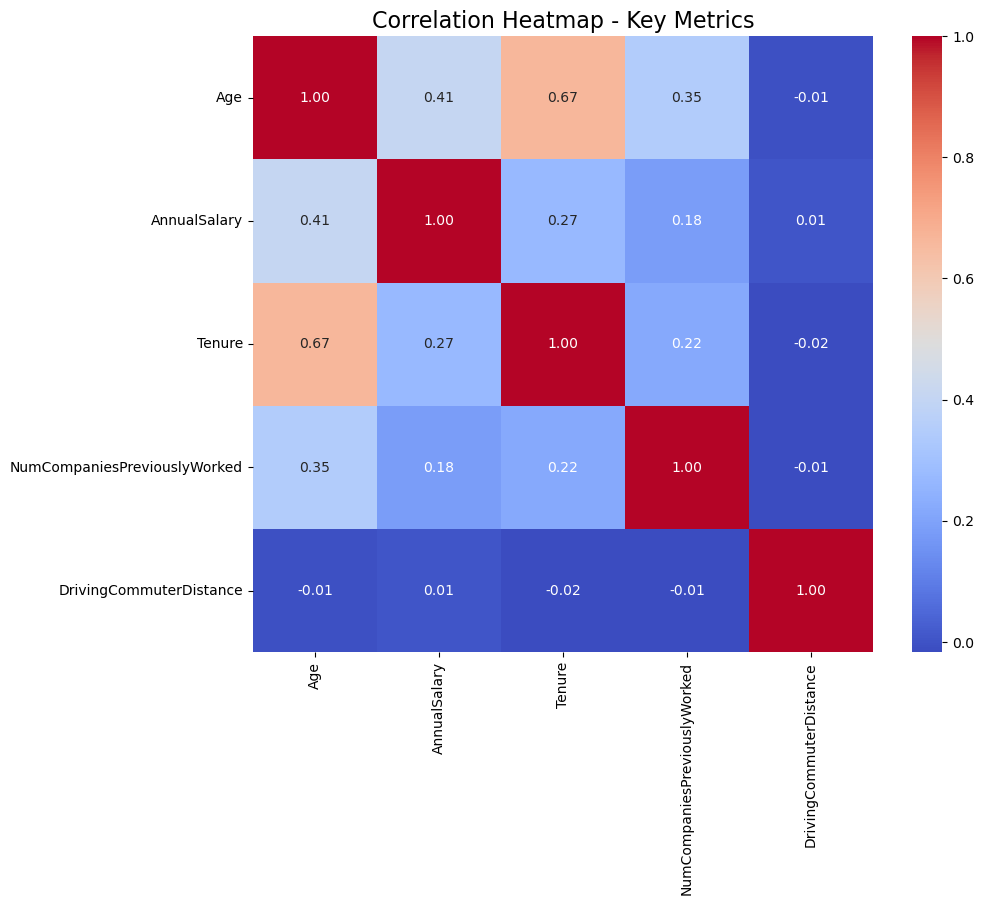

In [ ]:
# Correlation Heatmap

import matplotlib.pyplot as plt
import seaborn as sns

# Showing relevant numeric columns for correlation analysis
key_columns = ['Age', 'AnnualSalary', 'Tenure', 'NumCompaniesPreviouslyWorked', 'DrivingCommuterDistance']
correlation_matrix = df_cleaned[key_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(
    correlation_matrix,
    annot=True,
    cmap="coolwarm",
    fmt=".2f",
    annot_kws={"size": 10}
)
plt.title("Correlation Heatmap - Key Metrics", fontsize=16)
plt.show()


In [ ]:
# Save the cleaned dataset
output_path = "Cleaned_Employee_Turnover_Dataset.csv"
df_cleaned.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")


Cleaned dataset saved to: Cleaned_Employee_Turnover_Dataset.csv


---

## Advantages and Limitations of the Cleaning Process

### Advantages
- Missing values were handled systematically using median (numeric) and mode (categorical).  
- Negative values were corrected to reflect realistic data values.  
- Duplicate entries were removed to improve overall data quality.  
- Categorical variables were standardized for consistent formatting.

### Limitations
- Median and mode imputations may not fully capture the true data distribution.  
- Outliers were visually reviewed but not adjusted, which may influence certain analyses.
